In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

%matplotlib inline 
%pylab inline

pylab.rcParams['figure.figsize'] = (30, 20)

Populating the interactive namespace from numpy and matplotlib


In [36]:
data = pd.read_csv('predict_sales.csv')

In [37]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [38]:
data.shape

(8523, 12)

In [39]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [40]:
data.select_dtypes(include=['object']).columns.tolist()+['Outlet_Establishment_Year']

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Outlet_Establishment_Year']

In [41]:
cat_columns = list(set(data.select_dtypes(include=['object']).columns.tolist()+['Outlet_Establishment_Year'])-set(['Item_Identifier']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb758b7e48>,
      dtype=object)

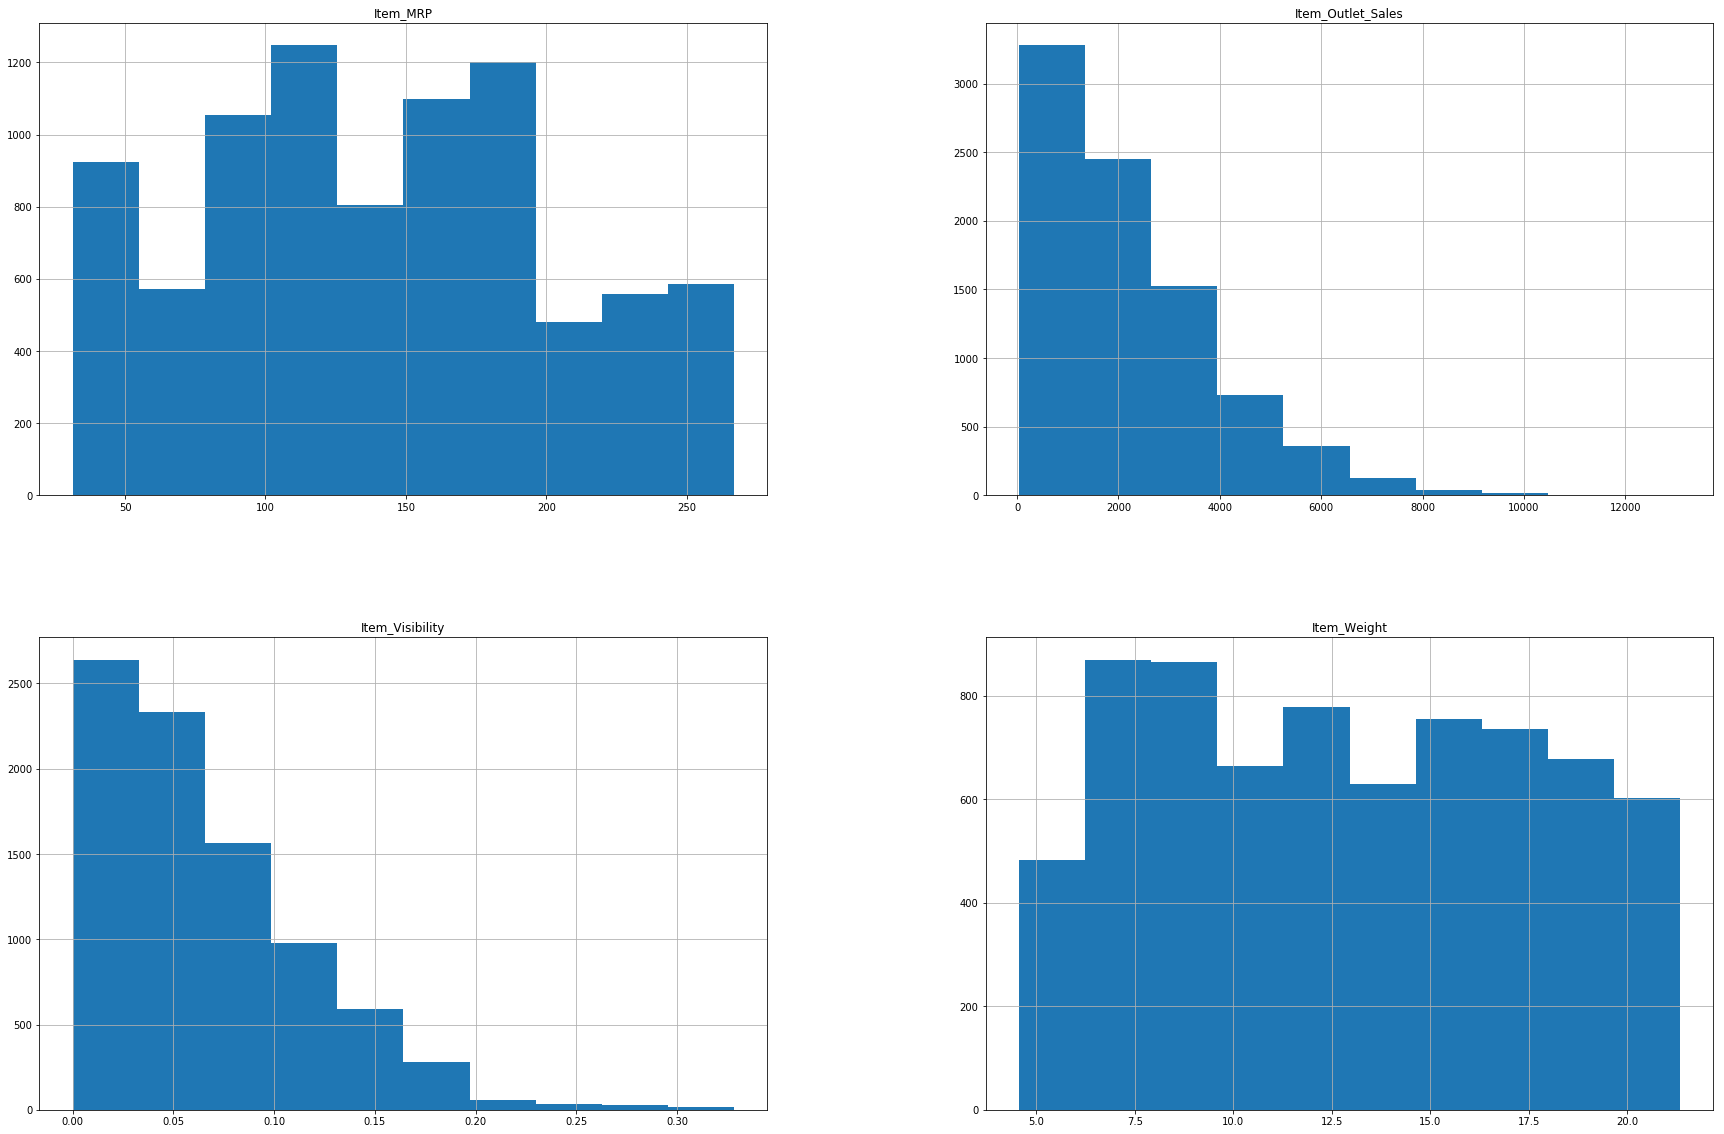

In [42]:
data[data.select_dtypes(include=['float']).columns].hist()

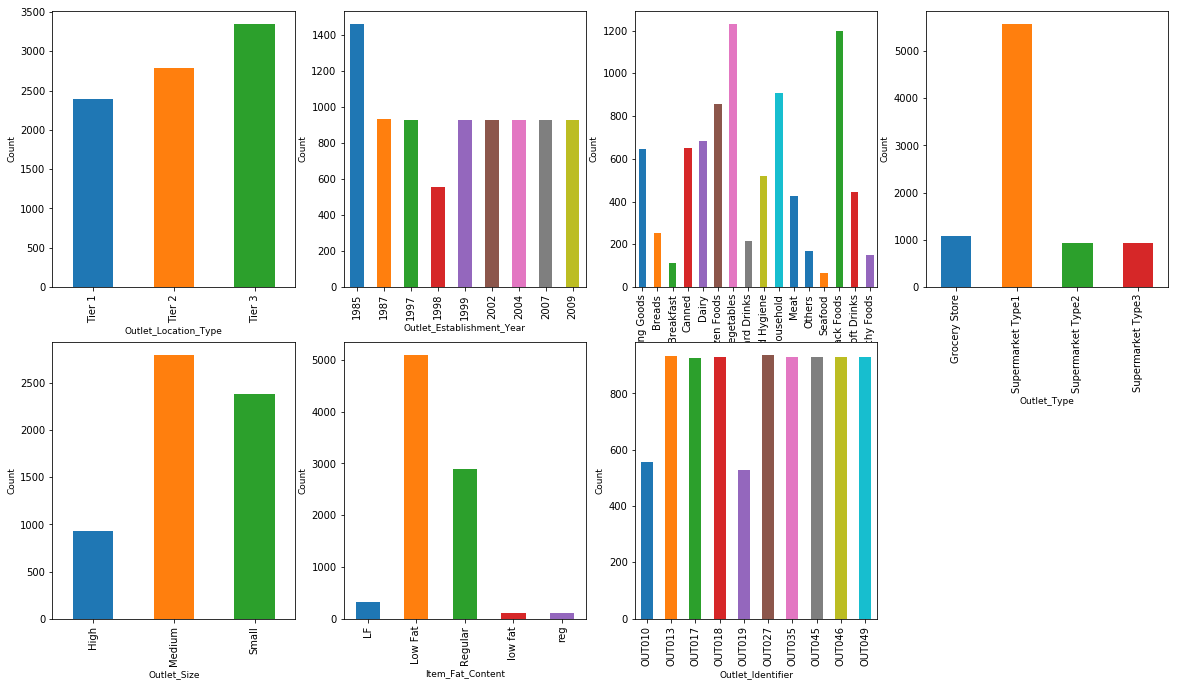

In [43]:
fig = plt.figure(figsize=(20,60))
ax=1

for x in cat_columns:
    ax1 = fig.add_subplot(10,4,ax)
    ax1 = data.groupby(x).size().plot(kind='bar')
    plt.xlabel(x, fontsize=9)
    plt.ylabel('Count', fontsize=9)
    ax+=1

In [44]:
data['Item_Fat_Content'] = data.Item_Fat_Content.replace({'Low Fat':'LF','low fat':'LF','Regular':'reg'})

Text(0,0.5,'Count')

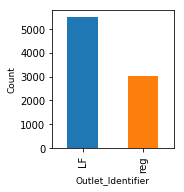

In [45]:
fig = plt.figure(figsize=(10,30))
ax1 = fig.add_subplot(10,4,ax)
ax1 = data.groupby('Item_Fat_Content').size().plot(kind='bar')
plt.xlabel(x, fontsize=9)
plt.ylabel('Count', fontsize=9)

In [46]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [47]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [48]:
data.groupby('Outlet_Type').apply(lambda x:x['Outlet_Size'].value_counts())

Outlet_Type              
Grocery Store      Small      528
Supermarket Type1  Small     1860
                   High       932
                   Medium     930
Supermarket Type2  Medium     928
Supermarket Type3  Medium     935
Name: Outlet_Size, dtype: int64

In [49]:
# Outlet_Size null and grocery stores
data[(data.Outlet_Size.isnull()) & (data.Outlet_Type=='Grocery Store')].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,reg,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,LF,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,LF,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266


In [50]:
# Outlet_Size null and Supermarket Type1
data[(data.Outlet_Size.isnull()) & (data.Outlet_Type=='Supermarket Type1')].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.20,reg,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,reg,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.00,LF,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
33,FDO23,17.85,LF,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.60,LF,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384


In [51]:
data.loc[(data.Outlet_Size.isnull()) & (data.Outlet_Type=='Grocery Store'),'Outlet_Size'] = 'Small'

In [52]:
data.loc[(data.Outlet_Size.isnull()) & (data.Outlet_Type=='Supermarket Type1'),'Outlet_Size'] = 'Small'

In [53]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [54]:
temp = data.groupby('Item_Identifier').first()['Item_Weight']
print(temp.head())
temp = dict(zip(temp.index,temp.tolist()))

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
Name: Item_Weight, dtype: float64


In [55]:
# data.loc[data.Item_Weight.isnull()].apply(lambda x:temp[x['Item_Type']])
data.loc[data.Item_Weight.isnull(),'Item_Weight'] = data.loc[data.Item_Weight.isnull()].Item_Identifier.apply(lambda x:temp[x])

In [56]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [57]:
temp = data.groupby('Item_Type').Item_Weight.mean()
temp

Item_Type
Baking Goods             12.285317
Breads                   11.297689
Breakfast                12.779727
Canned                   12.403320
Dairy                    13.379905
Frozen Foods             12.782404
Fruits and Vegetables    13.236713
Hard Drinks              11.456238
Health and Hygiene       13.052327
Household                13.524780
Meat                     12.771212
Others                   13.979438
Seafood                  12.521953
Snack Foods              13.031230
Soft Drinks              11.879775
Starchy Foods            13.841385
Name: Item_Weight, dtype: float64

In [58]:
data.loc[data.Item_Weight.isnull(),'Item_Weight'] = data[data.Item_Weight.isnull()].Item_Type.apply(lambda x:temp[x])

In [59]:
data['Outlet_Establishment_Year'] = data['Outlet_Establishment_Year'].apply(lambda x:abs(x-data['Outlet_Establishment_Year'].max()))

In [60]:
data['Outlet_Establishment_Year'].head()

0    10
1     0
2    10
3    11
4    22
Name: Outlet_Establishment_Year, dtype: int64

In [61]:
label_mapper = defaultdict(LabelEncoder)
# lab_mapper = {}

for col in cat_columns:
    print(col)
    data[col] = label_mapper[col].fit_transform(data[col].fillna(data[col].mode()[0]))
#     lab_mapper[col] = dict(zip(label_mapper[col].classes_, label_mapper[col].transform(label_mapper[col].classes_)))

Outlet_Location_Type
Outlet_Establishment_Year
Item_Type
Outlet_Type
Outlet_Size
Item_Fat_Content
Outlet_Identifier


In [62]:
# lab_mapper

In [63]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,9,4,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,3,0,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,9,4,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,0,5,2,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,1,7,0,2,1,994.7052


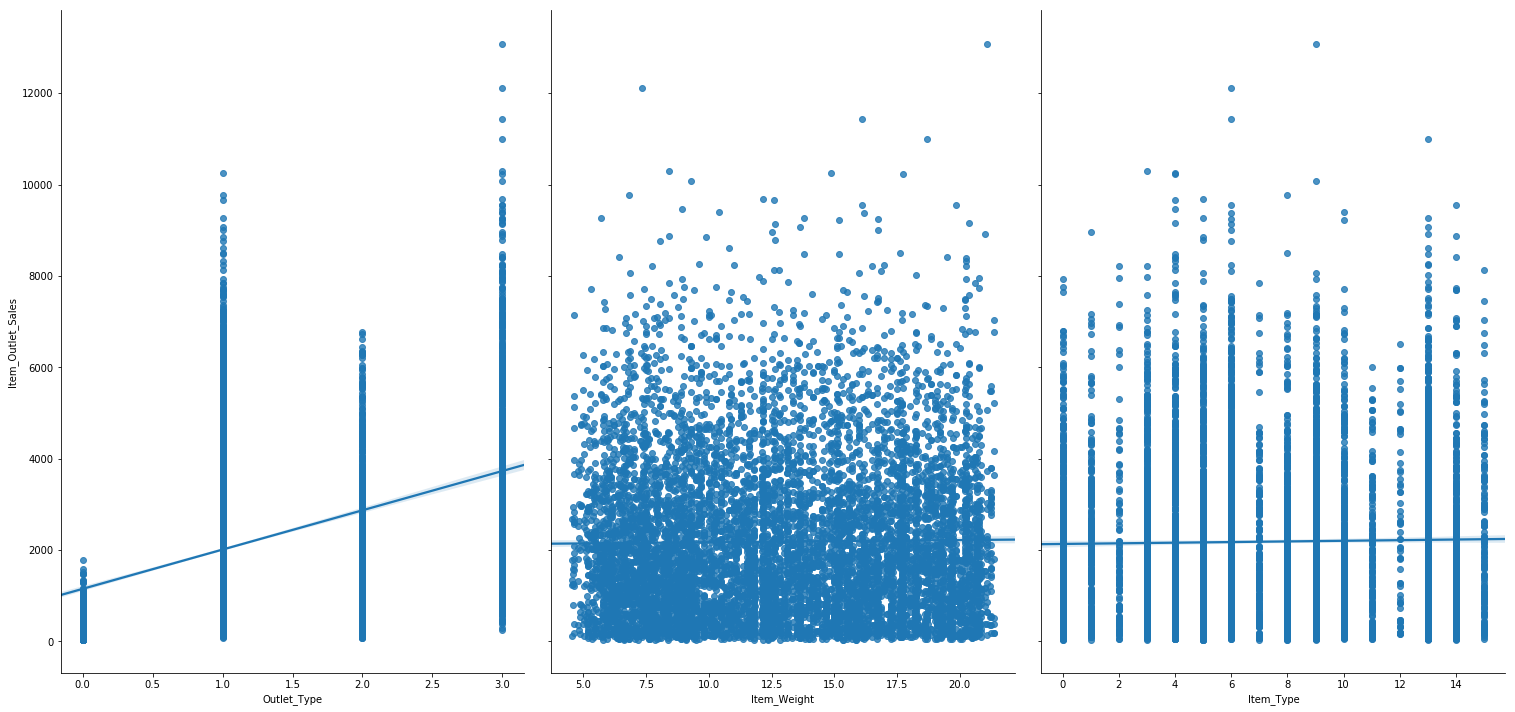

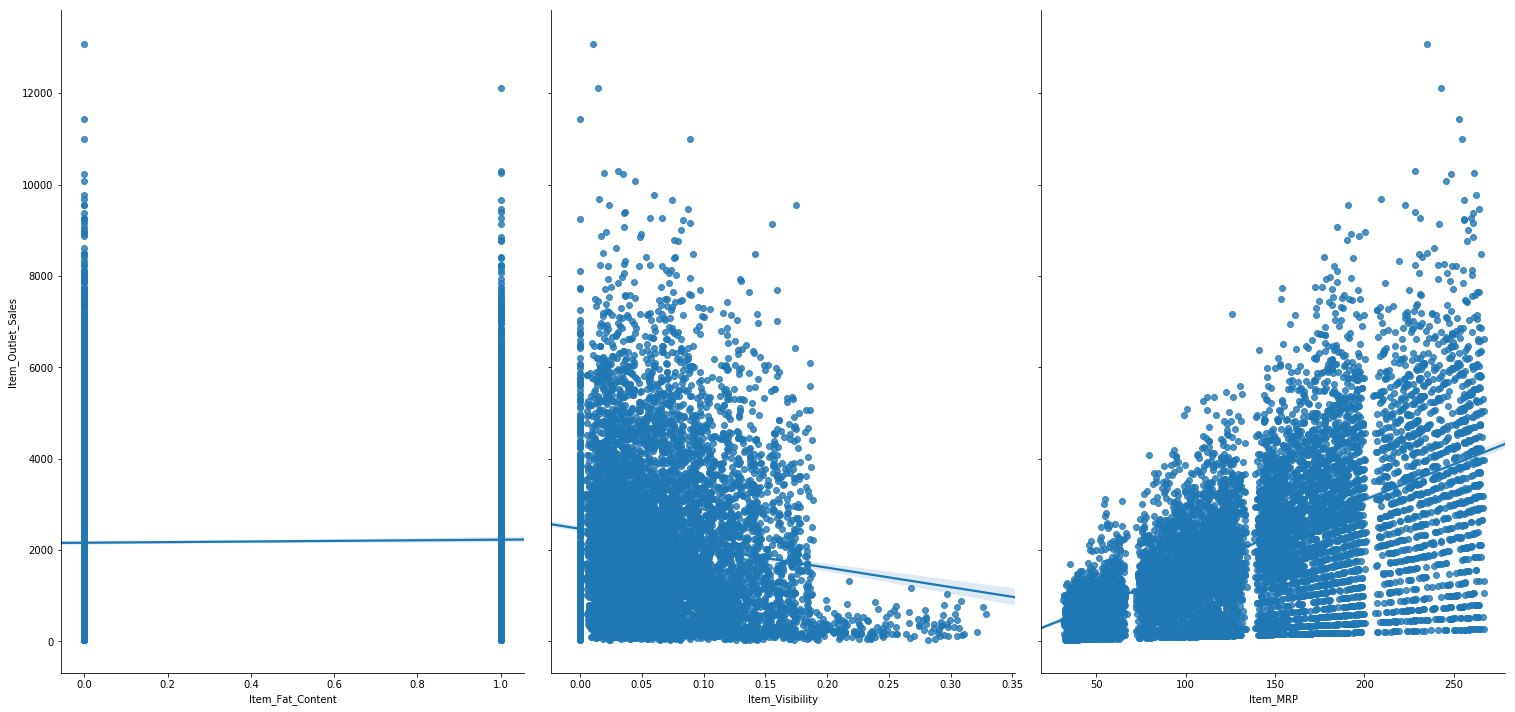

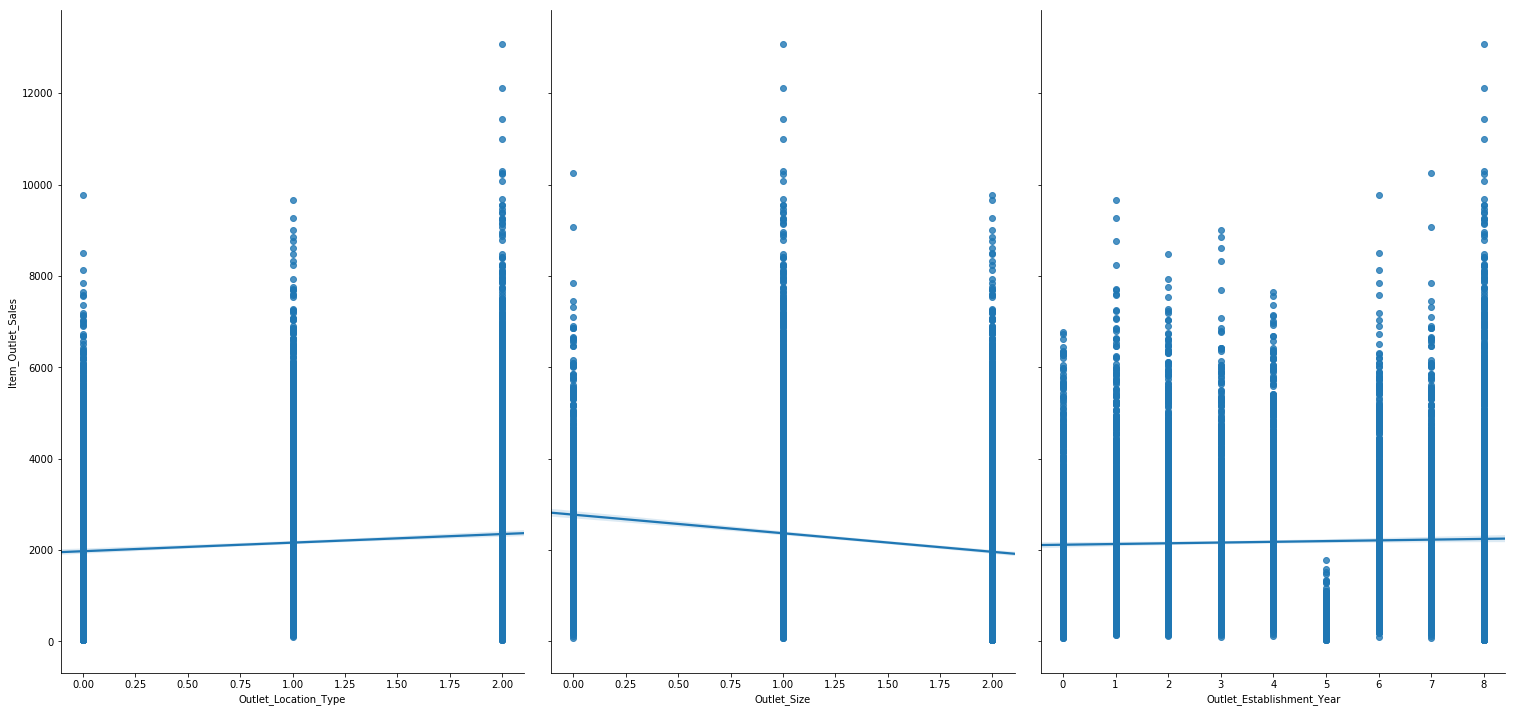

In [64]:
print(sns.pairplot(data, x_vars=['Outlet_Type',
     'Item_Weight',
     'Item_Type'], y_vars='Item_Outlet_Sales', size=10, aspect=0.7, kind='reg'))
print(sns.pairplot(data, x_vars=['Item_Fat_Content',
     'Item_Visibility','Item_MRP'], y_vars='Item_Outlet_Sales', size=10, aspect=0.7, kind='reg'))
print(sns.pairplot(data, x_vars=[     
     'Outlet_Location_Type',
     'Outlet_Size',
     'Outlet_Establishment_Year'], y_vars='Item_Outlet_Sales', size=10, aspect=0.7, kind='reg'))

In [65]:
# sns.pairplot(data, x_vars=list(set(data.columns)-set(['Item_Identifier','Item_Outlet_Sales'])), y_vars='Item_Outlet_Sales', size=10, aspect=0.7, kind='reg')

In [66]:
X = data.drop(['Item_Identifier','Item_Outlet_Sales','Outlet_Identifier'],axis=1)
y = data.Item_Outlet_Sales

In [67]:
# X['clus_label'] = data2['clus_label']

X = pd.get_dummies(X,columns=['Outlet_Location_Type','Item_Fat_Content','Outlet_Size','Item_Type','Outlet_Type'])

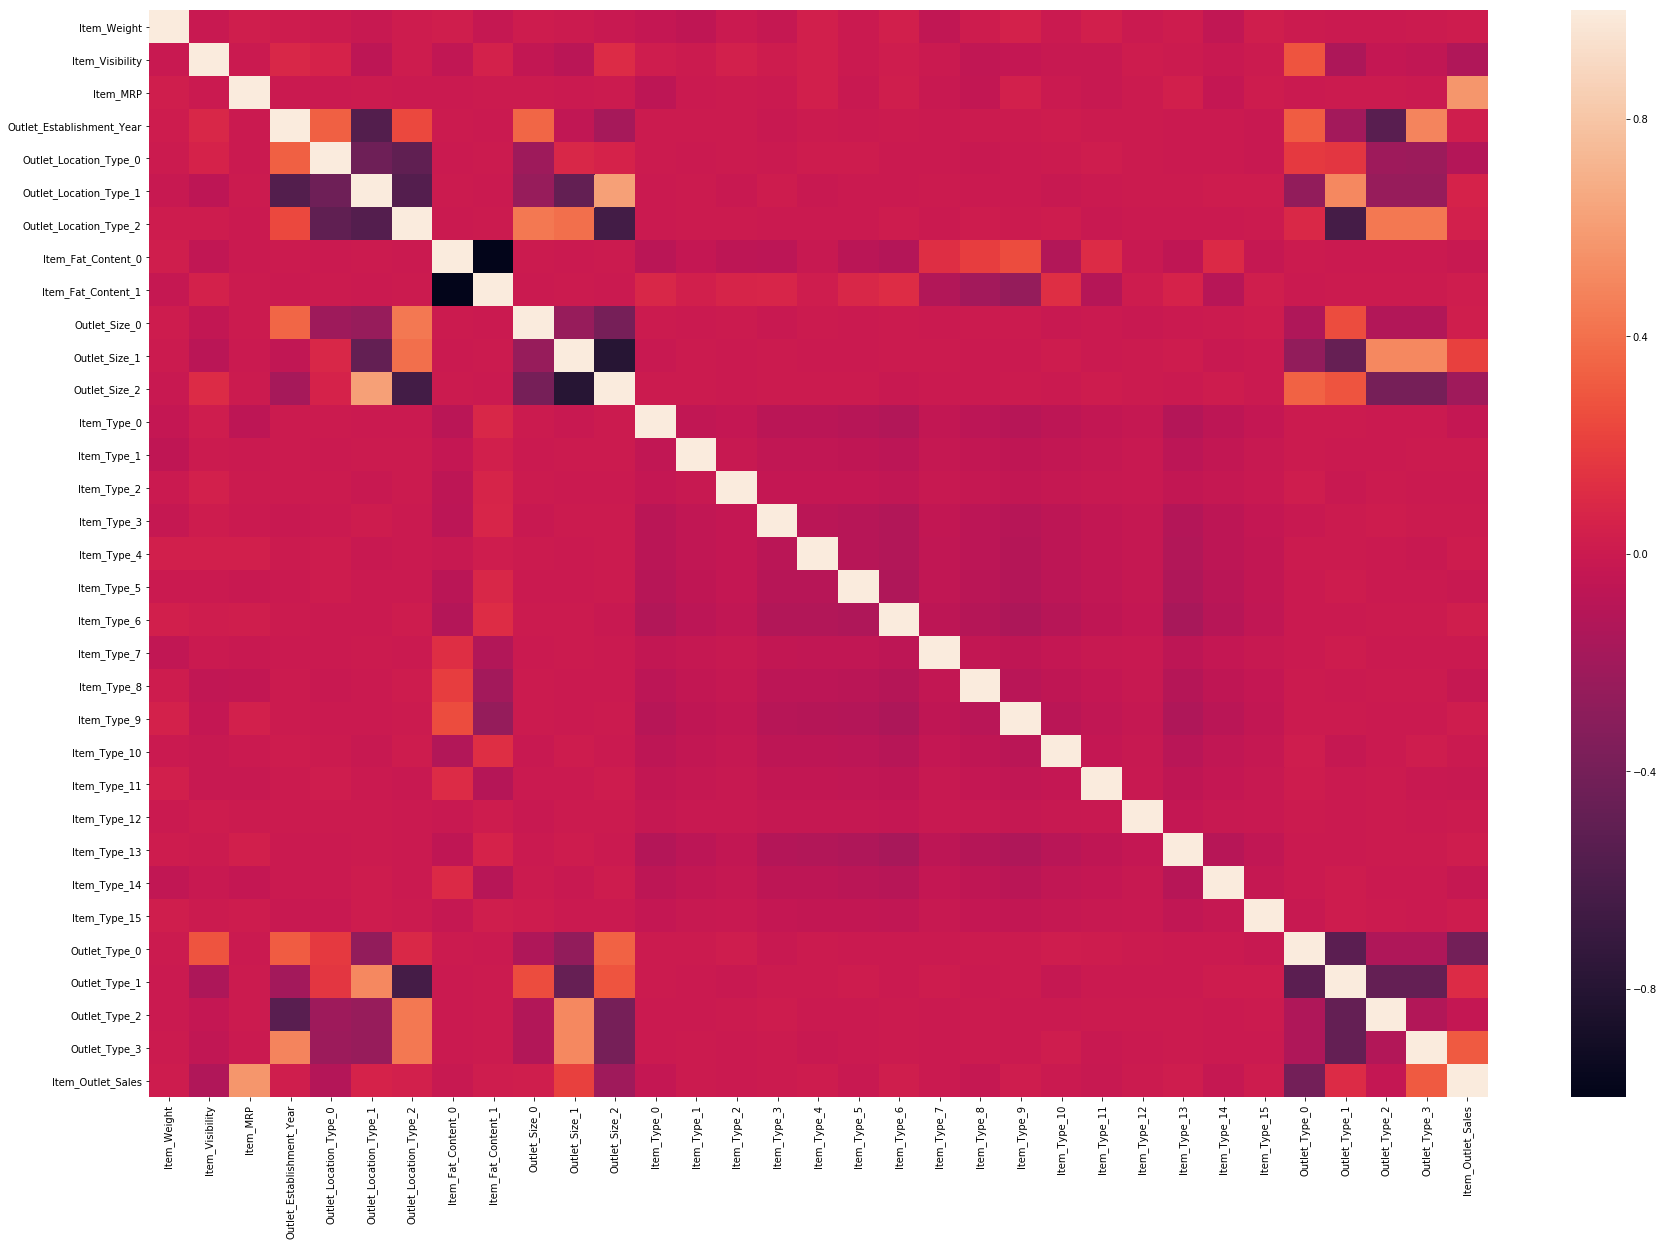

In [68]:
sns.heatmap(pd.concat([X,y],axis=1).corr())

In [69]:
from sklearn.ensemble import RandomForestRegressor  #algorithm
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import cross_validation, metrics   #Additional sklearn functions
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn import metrics
from sklearn.metrics import r2_score
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

scores = []

def modelfit(alg, dtrain, y, performCV=True, printFeatureImportance=True, cv_folds=5):
    alg.fit(dtrain, y)

    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain, y, cv=cv_folds, scoring='mean_squared_error')
        cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    
    if performCV:
        print("RMSE : %.4g" % np.sqrt(mean_squared_error(y, dtrain_predictions)))
        print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


        
def evaluate(actual, pred, tag):
    print(f'---{tag}---')
    print('{:<30}: {:<30}'.format('mean_absolute_error',metrics.mean_absolute_error(actual, pred)))
    print('{:<30}: {:<30}'.format('mean_squared_error',metrics.mean_squared_error(actual, pred)))
    print('{:<30}: {:<30}'.format('root_mean_squared_error',np.sqrt(metrics.mean_squared_error(actual, pred))))
    return ""


In [70]:
X.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Item_Type_0', 'Item_Type_1',
       'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_Type_5',
       'Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9',
       'Item_Type_10', 'Item_Type_11', 'Item_Type_12', 'Item_Type_13',
       'Item_Type_14', 'Item_Type_15', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3'],
      dtype='object')

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [72]:
rfm = RandomForestRegressor()
modelfit(rfm, X_train, y_train)


Model Report
RMSE : 499.4
CV Score : Mean - 1187 | Std - 20.3 | Min - 1156 | Max - 1218


In [73]:
scores.append(rfm.score(X_test,y_test))

In [74]:
print(evaluate(y_train, rfm.predict(X_train),'Train Data'))
print(evaluate(y_test, rfm.predict(X_test),'Test Data'))

---Train Data---
mean_absolute_error           : 328.48746860369613            
mean_squared_error            : 249429.97513981228            
root_mean_squared_error       : 499.42964984050786            

---Test Data---
mean_absolute_error           : 791.3006446099706             
mean_squared_error            : 1286301.1289970356            
root_mean_squared_error       : 1134.1521630702978            



In [75]:
# X = pd.get_dummies(X,columns=['Outlet_Location_Type','Item_Fat_Content','Outlet_Size','Item_Type','Outlet_Type','Item_Cat'])

In [76]:
lr = LinearRegression()
modelfit(lr, X_train, y_train)


Model Report
RMSE : 1142
CV Score : Mean - 1148 | Std - 14.3 | Min - 1128 | Max - 1165


In [77]:
scores.append(lr.score(X_test,y_test))

In [78]:
print(evaluate(y_train, lr.predict(X_train),'Train Data'))
print(evaluate(y_test, lr.predict(X_test),'Test Data'))

---Train Data---
mean_absolute_error           : 847.5492825089431             
mean_squared_error            : 1304239.254539609             
root_mean_squared_error       : 1142.0329480972118            

---Test Data---
mean_absolute_error           : 792.8218447242352             
mean_squared_error            : 1144861.875191594             
root_mean_squared_error       : 1069.9821845206554            



In [79]:
ls = Lasso(max_iter=10e5)
modelfit(ls, X_train, y_train)


Model Report
RMSE : 1143
CV Score : Mean - 1147 | Std - 15.1 | Min - 1126 | Max - 1164


In [80]:
scores.append(ls.score(X_test,y_test))

In [81]:
print(evaluate(y_train, ls.predict(X_train),'Train Data'))
print(evaluate(y_test, ls.predict(X_test),'Test Data'))

---Train Data---
mean_absolute_error           : 847.5685786947924             
mean_squared_error            : 1305607.0504651824            
root_mean_squared_error       : 1142.631633758309             

---Test Data---
mean_absolute_error           : 791.5629252941626             
mean_squared_error            : 1143970.5818664723            
root_mean_squared_error       : 1069.5656042835672            



In [82]:
xgbr = XGBRegressor()
modelfit(xgbr, X_train, y_train)


Model Report
RMSE : 1042
CV Score : Mean - 1098 | Std - 17.35 | Min - 1077 | Max - 1119


In [83]:
print(evaluate(y_train, xgbr.predict(X_train),'Train Data'))
print(evaluate(y_test, xgbr.predict(X_test),'Test Data'))

---Train Data---
mean_absolute_error           : 735.5553638396824             
mean_squared_error            : 1085749.397646128             
root_mean_squared_error       : 1041.9929930887865            

---Test Data---
mean_absolute_error           : 721.1505033028973             
mean_squared_error            : 1069250.1304989564            
root_mean_squared_error       : 1034.0455166475779            



In [84]:
scores.append(xgbr.score(X_test,y_test))

In [85]:
xgbr.score(X_test,y_test)

0.606599740139913

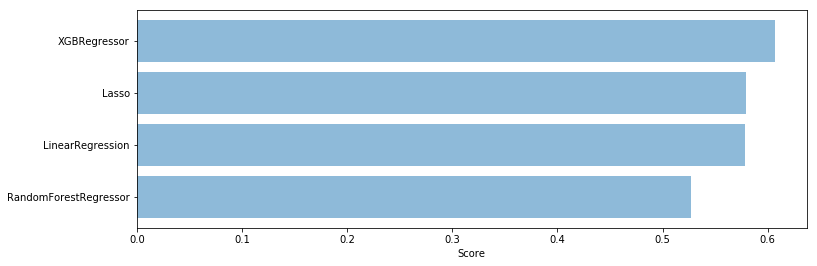

In [86]:
algs = ('RandomForestRegressor',
'LinearRegression',
'Lasso',
'XGBRegressor')

plt.barh(np.arange(4), scores, align='center', alpha=0.5)
plt.yticks(np.arange(4), algs)
plt.xlabel('Score')
plt.show()